## Data Visualization

In [3]:
import pandas as pd
pumpkins = pd.read_csv('../data/US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [4]:
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [5]:
columns_to_select = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]

In [6]:
price = (pumpkins["Low Price"] + pumpkins["High Price"]) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month

In [7]:
print(month)

Index([ 4,  5,  9,  9, 11, 11,  9,  9, 10, 10,
       ...
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
      dtype='int32', name='Date', length=1757)


In [8]:
new_pumpkins = pd.DataFrame({'Month': month, 'Package':pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})

In [9]:
new_pumpkins.tail()

,Month,Package,Low Price,High Price,Price
1752,9,22 lb cartons,14.75,14.75,14.75
1753,9,36 inch bins,275.00,275.00,275.00
1754,9,36 inch bins,275.00,275.00,275.00
1755,9,36 inch bins,275.00,275.00,275.00
1756,9,36 inch bins,275.00,275.00,275.00


In [10]:
new_pumpkins = new_pumpkins[new_pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [11]:
print(pumpkins)

            Package  Low Price  High Price     Date
0      24 inch bins     270.00      280.00  4/29/17
1      24 inch bins     270.00      280.00   5/6/17
2      24 inch bins     160.00      160.00  9/24/16
3      24 inch bins     160.00      160.00  9/24/16
4      24 inch bins      90.00      100.00  11/5/16
...             ...        ...         ...      ...
1752  22 lb cartons      14.75       14.75  9/30/16
1753   36 inch bins     275.00      275.00  9/26/16
1754   36 inch bins     275.00      275.00  9/27/16
1755   36 inch bins     275.00      275.00  9/28/16
1756   36 inch bins     275.00      275.00  9/29/16

[1757 rows x 4 columns]


In [12]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

In [13]:
print(new_pumpkins)

      Month               Package  Low Price  High Price  Price
70        9  1 1/9 bushel cartons      15.00        15.0  13.50
71        9  1 1/9 bushel cartons      18.00        18.0  16.20
72       10  1 1/9 bushel cartons      18.00        18.0  16.20
73       10  1 1/9 bushel cartons      17.00        17.0  15.30
74       10  1 1/9 bushel cartons      15.00        15.0  13.50
...     ...                   ...        ...         ...    ...
1738      9    1/2 bushel cartons      15.00        15.0  30.00
1739      9    1/2 bushel cartons      13.75        15.0  28.75
1740      9    1/2 bushel cartons      10.75        15.0  25.75
1741      9    1/2 bushel cartons      12.00        12.0  24.00
1742      9    1/2 bushel cartons      12.00        12.0  24.00

[415 rows x 5 columns]


In [14]:
import matplotlib.pyplot as plt

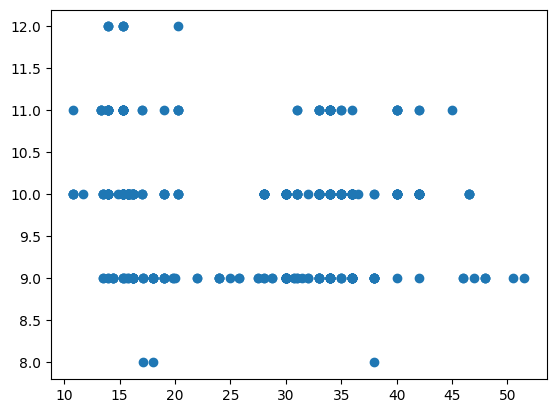

In [15]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price,month)
plt.show()

<Axes: xlabel='Month'>

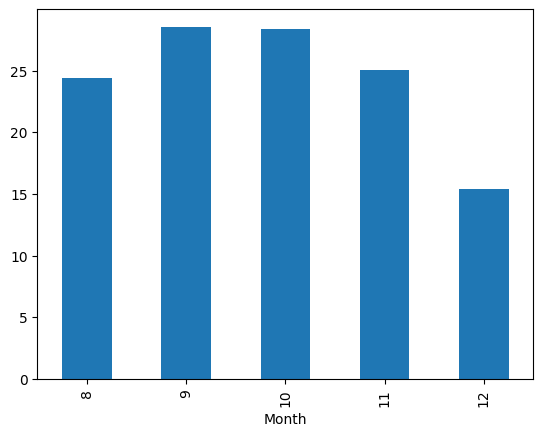

In [16]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')

In [17]:
import seaborn as sns

<Axes: xlabel='Month', ylabel='Price'>

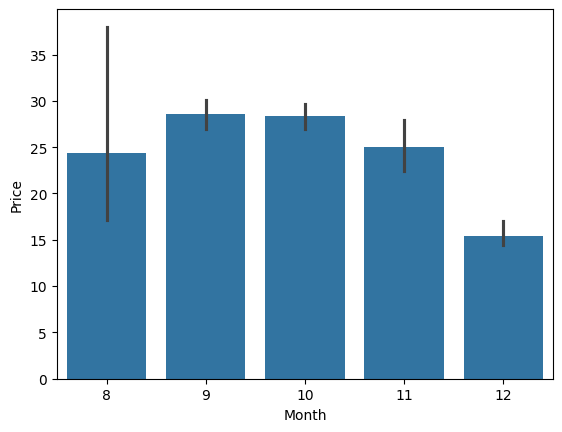

In [18]:
# Calculate the order of months sorted by average price
sorted_months = new_pumpkins.groupby('Month')['Price'].mean().index

# Pass this order to the plot
sns.barplot(data=new_pumpkins, x='Month', y='Price', order=sorted_months)